### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data

In [2]:
commodities = pd.read_excel('modified.xlsx')
commodities

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808
...,...,...,...,...,...
715,2017,AUGUST,COCOYAM,91,208.950
716,2017,SEPTEMBER,COCOYAM,91,193.720
717,2017,OCTOBER,COCOYAM,91,210.270
718,2017,NOVEMBER,COCOYAM,91,197.450


### Basic Manipulations

In [3]:
### info about the data
commodities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


In [4]:
### finding the null values
commodities.isnull().sum()

YEAR                  0
MONTH                 0
COMMODITY             0
WEIGHT, KG PER BAG    0
 PRICE, ¢ GH          0
dtype: int64

In [5]:
### finding the data aggregation
commodities.describe()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
count,720.000000,720.000000,720.000000
mean,2012.491667,123.833333,113.982091
std,2.871361,56.759258,162.115749
min,2008.000000,91.000000,0.007000
25%,2010.000000,93.000000,15.141000
50%,2012.500000,100.000000,52.390000
75%,2015.000000,109.000000,140.122500
max,2017.000000,250.000000,920.550000


## Univarite Analysis

### Price

In [6]:
commodities[' PRICE, ¢ GH'].describe()

count    720.000000
mean     113.982091
std      162.115749
min        0.007000
25%       15.141000
50%       52.390000
75%      140.122500
max      920.550000
Name:  PRICE, ¢ GH, dtype: float64

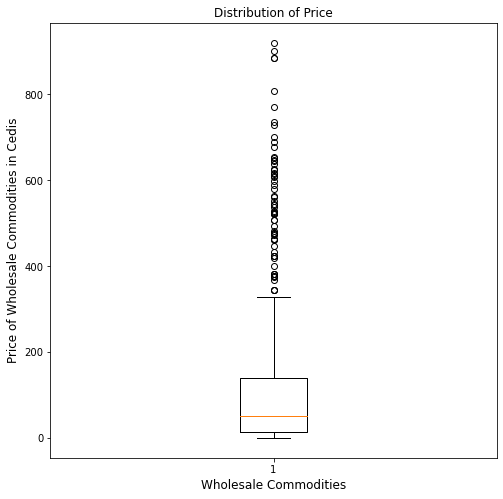

In [7]:
plt.figure(figsize = (8,8))
plt.boxplot(commodities[' PRICE, ¢ GH'])
plt.title('Distribution of Price', size = 12)
plt.xlabel('Wholesale Commodities', size = 12)
plt.ylabel('Price of Wholesale Commodities in Cedis', size = 12)
plt.show()

From the diagram, the maximum price is **GHS920** and 50% of the commodities were wholesaled at GHS52 or less. The remaining 50% of the commodities were wholesaled at prices above GHS52. Meaning the company will make more profit. 


### Weight

In [8]:
commodities['WEIGHT, KG PER BAG'].describe()

count    720.000000
mean     123.833333
std       56.759258
min       91.000000
25%       93.000000
50%      100.000000
75%      109.000000
max      250.000000
Name: WEIGHT, KG PER BAG, dtype: float64

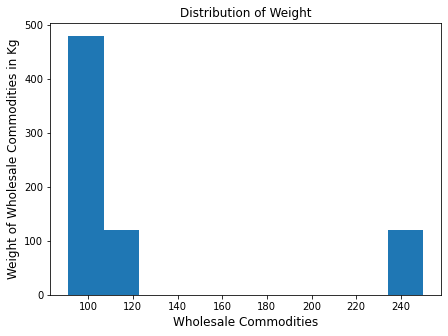

In [10]:
plt.figure(figsize = (7,5))
plt.hist(commodities['WEIGHT, KG PER BAG'])
plt.title('Distribution of Weight', fontsize = 12)
plt.xlabel('Wholesale Commodities', fontsize = 12)
plt.ylabel('Weight of Wholesale Commodities in Kg', fontsize = 12)
plt.show()

From the distribution, 50% of the commodities weighed 100kg. The remaining 50% of the commodities are weighing between 100kg and 250kg. THis means that the commodities that weighed above 100kg were not much. We can confidently say that the crop yield was poor or production was less.

## Multivariate Analysis

In [25]:
#checking the commodity with the maximum price
commodities.groupby(['YEAR'])[['COMMODITY',' PRICE, ¢ GH']].max()

,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,YAM,689.87
2009,YAM,920.55
2010,YAM,884.20
2011,YAM,202.10
2012,YAM,280.46
2013,YAM,297.40
2014,YAM,344.45
2015,YAM,378.35
2016,YAM,524.89


In [26]:
#checking the commodity with the minimum price
commodities.groupby(['YEAR'])[['COMMODITY',' PRICE, ¢ GH']].min()

,COMMODITY,"PRICE, ¢ GH"
YEAR,,
2008,COCOYAM,0.131
2009,COCOYAM,3.317
2010,COCOYAM,4.382
2011,COCOYAM,0.007
2012,COCOYAM,0.010
2013,COCOYAM,0.008
2014,COCOYAM,0.010
2015,COCOYAM,0.010
2016,COCOYAM,0.010


### Table Chart

In [11]:
commodities.sort_values(by = 'WEIGHT, KG PER BAG', ascending = False).tail()

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
635,2010,DECEMBER,COCOYAM,91,57.57
634,2010,NOVEMBER,COCOYAM,91,48.41
633,2010,OCTOBER,COCOYAM,91,48.51
632,2010,SEPTEMBER,COCOYAM,91,46.99
719,2017,DECEMBER,COCOYAM,91,195.17


This is showing the last five commodities with the highest weight

In [12]:
commodities.sort_values(by = ' PRICE, ¢ GH', ascending = False).head()

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
377,2009,JUNE,SORGHUM,109,920.55
378,2009,JULY,SORGHUM,109,900.79
389,2010,JUNE,SORGHUM,109,884.20
390,2010,JULY,SORGHUM,109,884.15
388,2010,MAY,SORGHUM,109,807.45


This is showing the first five commodities with the highest price

### Pie Chart

In [13]:
commodities.groupby('COMMODITY')[' PRICE, ¢ GH'].sum()

COMMODITY
COCOYAM       12249.5800
LOCAL RICE     9775.0231
MAIZE          5660.5251
MILLET         1372.0730
SORGHUM       22703.6540
YAM           30306.2500
Name:  PRICE, ¢ GH, dtype: float64

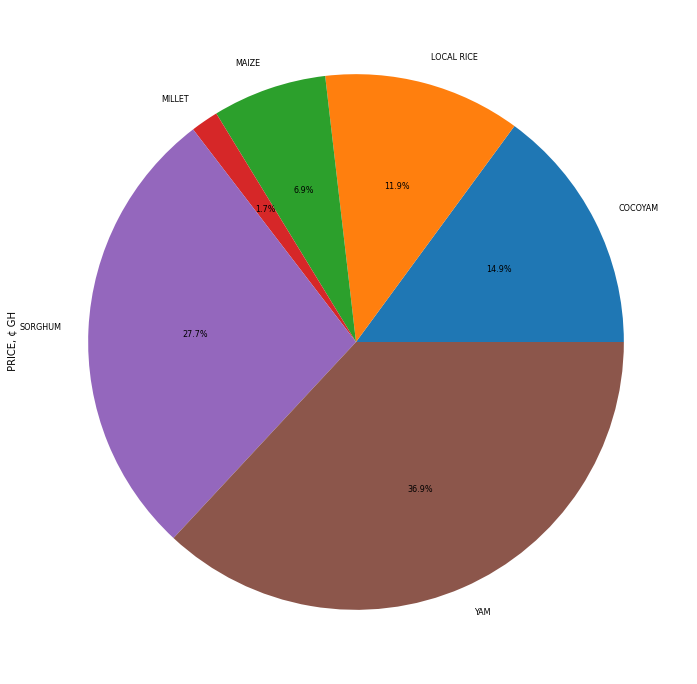

In [23]:
commodities.groupby('COMMODITY')[' PRICE, ¢ GH'].sum().plot(kind = 'pie', figsize = (12,15), fontsize = 8, autopct = '%1.1f%%')
plt.show()

This is showing the various commodities against their total price. The chart shows that Yam has the higest in terms of price followed by Sorghum and Millet had the least price.

In [16]:
commodities.corr()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
YEAR,1.000000e+00,1.103780e-13,0.053873
"WEIGHT, KG PER BAG",1.103780e-13,1.000000e+00,0.404250
"PRICE, ¢ GH",5.387296e-02,4.042497e-01,1.000000


There is a fairly strong positive correlation between 'Weight' and 'Price' of the commodities

### Barchart

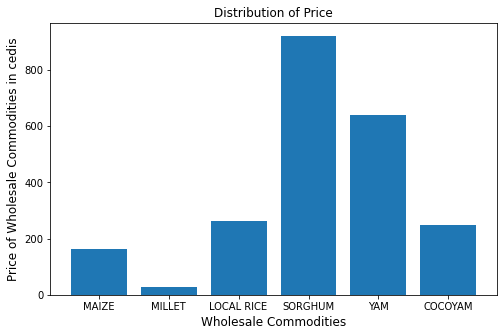

In [17]:
plt.figure(figsize = (8,5))
plt.bar(commodities['COMMODITY'], commodities[' PRICE, ¢ GH'])
plt.title('Distribution of Price', fontsize = 12)
plt.xlabel('Wholesale Commodities', fontsize = 12)
plt.ylabel('Price of Wholesale Commodities in cedis', fontsize = 12)
plt.show()

From the distribution, Sorghum has the highest wholesale price followed by Yam. Millet has the lowest wholesale price.